<a href="https://colab.research.google.com/github/volcanohawk/UnsyiahWorkshop/blob/main/WorkshopVulkanologiUnsyiah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop Analisis Data Seismik Gunung Api**

Universitas Syiah Kuala, Aceh
31 Agustus 2021
Devy Kamil Syahbana (08112223009)

---



# **1. Instalasi Obspy**

Source:
https://github.com/obspy/obspy/wiki/installation-on-windows-using-a-pre-build-package-(pypi)



**Mengecek versi python yang dipakai**

In [ ]:
!python

Python 3.7.11 (default, Jul  3 2021, 18:01:19) 
[GCC 7.5.0] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> 

KeyboardInterrupt
>>> 
KeyboardInterrupt
>>> ^C


**Step instalasi Obspy di Google Colab**

In [ ]:
!pip list

Package                       Version
----------------------------- --------------
absl-py                       0.12.0
alabaster                     0.7.12
albumentations                0.1.12
altair                        4.1.0
appdirs                       1.4.4
argcomplete                   1.12.3
argon2-cffi                   20.1.0
arviz                         0.11.2
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
atari-py                      0.2.9
atomicwrites                  1.4.0
attrs                         21.2.0
audioread                     2.1.9
autograd                      1.3
Babel                         2.9.1
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        4.0.0
blis                          0.4.1
bokeh                         2.3.3
Bottleneck                    1.3.2
branca                        0.4.2
bs4                           0.0.1
CacheControl

In [4]:
!wget https://bootstrap.pypa.io/get-pip.py

--2021-08-31 03:53:48--  https://bootstrap.pypa.io/get-pip.py
Resolving bootstrap.pypa.io (bootstrap.pypa.io)... 151.101.0.175, 151.101.64.175, 151.101.128.175, ...
Connecting to bootstrap.pypa.io (bootstrap.pypa.io)|151.101.0.175|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1957374 (1.9M) [text/x-python]
Saving to: ‘get-pip.py’

get-pip.py          100%[===================>]   1.87M  --.-KB/s    in 0.06s   

2021-08-31 03:53:48 (32.5 MB/s) - ‘get-pip.py’ saved [1957374/1957374]



In [5]:
!python get-pip.py

     |████████████████████████████████| 1.6 MB 5.1 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [6]:
!pip install lxml sqlalchemy

In [7]:
!pip install pyreadline ipython

     |████████████████████████████████| 109 kB 5.3 MB/s 
  Created wheel for pyreadline: filename=pyreadline-2.1-py3-none-any.whl size=93835 sha256=5ebb233949e06fdadffad40bdda1e2d84463ee7c02a4c3c46e154b40f8e02674
  Stored in directory: /root/.cache/pip/wheels/00/6e/d4/7c4b7bc22c090baf4f470e7f35c4f22206277229bdb6607df6
Successfully built pyreadline


In [8]:
!pip install flake8 nose mock

     |████████████████████████████████| 73 kB 1.2 MB/s 
     |████████████████████████████████| 154 kB 11.3 MB/s 
     |████████████████████████████████| 68 kB 4.7 MB/s 
     |████████████████████████████████| 41 kB 480 kB/s 


In [1]:
!pip install obspy

     |████████████████████████████████| 24.7 MB 71 kB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for obspy: filename=obspy-1.2.2-cp37-cp37m-linux_x86_64.whl size=21666749 sha256=968596fd0fdda65d40f4fe396f437eacd70b682b9a8673b535a0a063b65bd22b
  Stored in directory: /root/.cache/pip/wheels/28/7e/ea/0a37d5f5001d096cf97d6527b60300badd2d0074449e89c736
Successfully built obspy


**Cek apakah Obspy sudah terinstall**

In [2]:
import obspy

**Update Obspy**

In [3]:
!pip install -U obspy

# **2. Analisis Dasar Seismik dengan Obspy**

Source: https://docs.obspy.org/tutorial/

**2.1. UTC Datetime**

In [4]:
from obspy.core import UTCDateTime
UTCDateTime("2012-09-07T12:15:00")

2012-09-07T12:15:00.000000Z

**2.2. Membaca Data Seismik**

In [1]:
from obspy import read

st = read('http://examples.obspy.org/RJOB_061005_072159.ehz.new')
print(st)

1 Trace(s) in Stream:
.RJOB..Z | 2005-10-06T07:21:59.850000Z - 2005-10-06T07:24:59.845000Z | 200.0 Hz, 36000 samples


**2.3. Cek Metadata**

In [2]:
tr = st[0]
print(tr.stats)

         network: 
         station: RJOB
        location: 
         channel: Z
       starttime: 2005-10-06T07:21:59.850000Z
         endtime: 2005-10-06T07:24:59.845000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 36000
           calib: 0.0949
         _format: GSE2
            gse2: AttribDict({'auxid': 'RJOB', 'datatype': 'CM6', 'calper': 1.0, 'instype': '', 'hang': -1.0, 'vang': -1.0, 'lat': -999.0, 'lon': -999.0, 'coordsys': '', 'elev': -0.999, 'edepth': -0.999})


**2.4. Menampilkan waveform**

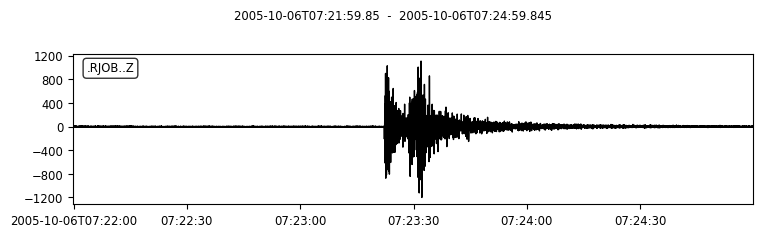

/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: AutoDateLocator was unable to pick an appropriate interval for this date range. It may be necessary to add an interval value to the AutoDateLocator's intervald dictionary. Defaulting to 30.
  fig.canvas.print_figure(bytes_io, **kw)


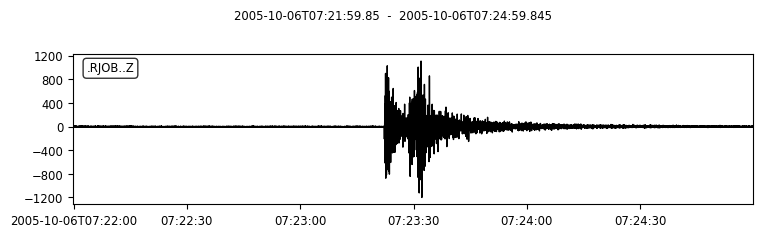

In [3]:
st.plot()

**2.5. Membaca data dari webservice**

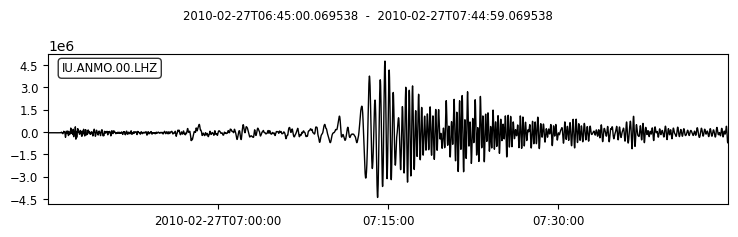

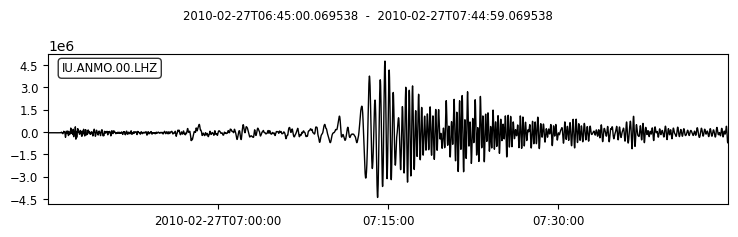

In [5]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

client = Client("IRIS")

t = UTCDateTime("2010-02-27T06:45:00.000")
stws = client.get_waveforms("IU", "ANMO", "00", "LHZ", t, t + 60 * 60)
stws.plot()

**2.6. Menyimpan data**

In [6]:
stws.write("iris.mseed", format="MSEED")

**2.7. Menampilkan Seismogram dari folder lokal**

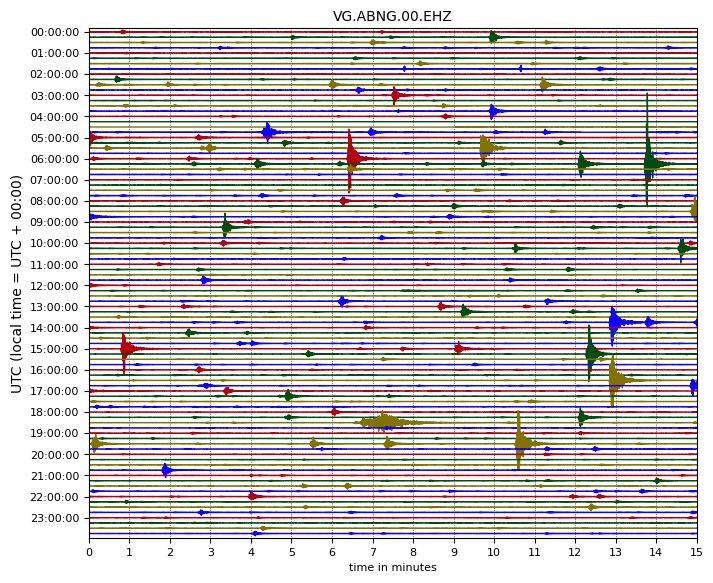

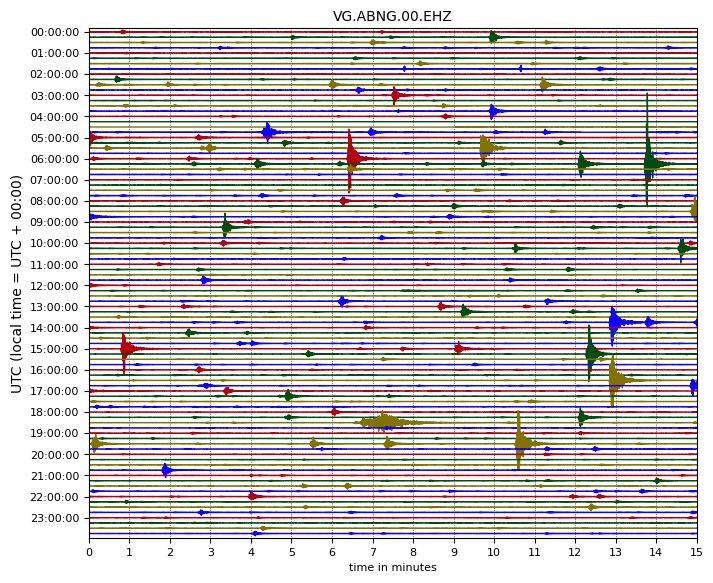

In [7]:
stdaily = read('/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/SDSDaily/VG.ABNG.00.EHZ.D.2017.296')
stdaily.plot(type='dayplot')

**2.8. Mendeteksi event gempa**

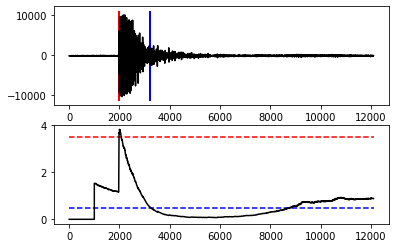

In [11]:
import obspy
from obspy.clients.fdsn import Client
from obspy.signal.trigger import recursive_sta_lta, trigger_onset, plot_trigger

import matplotlib.pyplot as plt

stdetect = read('/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/ProximalVT-VulkanikDangkal/20210715011225/PUSS_EHZ_VG_00.mseed')
trdetect = stdetect[0]

df = trdetect.stats.sampling_rate

cft = recursive_sta_lta(trdetect.data, int(2.5 * df), int(10. * df))
on_of = trigger_onset(cft, 3.5, 0.5)

ax = plt.subplot(211)
plt.plot(trdetect.data, 'k')
ymin, ymax = ax.get_ylim()
plt.vlines(on_of[:, 0], ymin, ymax, color='r', linewidth=2)
plt.vlines(on_of[:, 1], ymin, ymax, color='b', linewidth=2)
plt.subplot(212, sharex=ax)
plt.plot(cft, 'k')
plt.hlines([3.5, 0.5], 0, len(cft), color=['r', 'b'], linestyles='--')
plt.axis('tight')
plt.show()

**2.9. Filter data seismik**

Source:
https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.filter.html

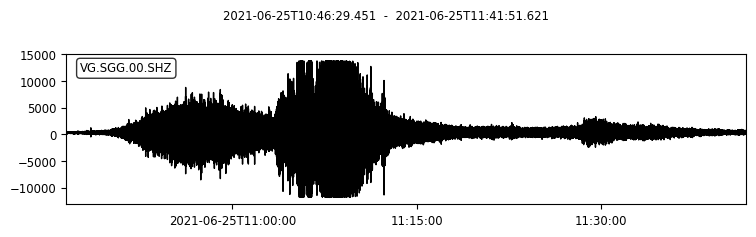

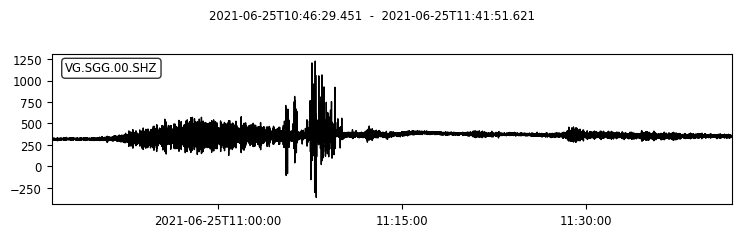

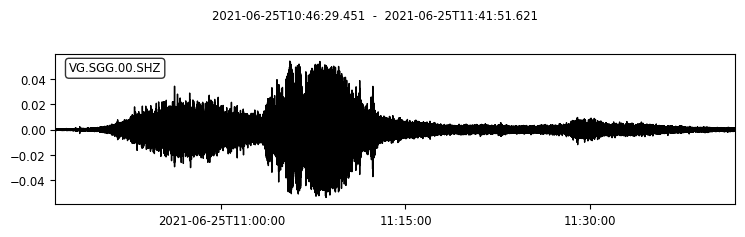

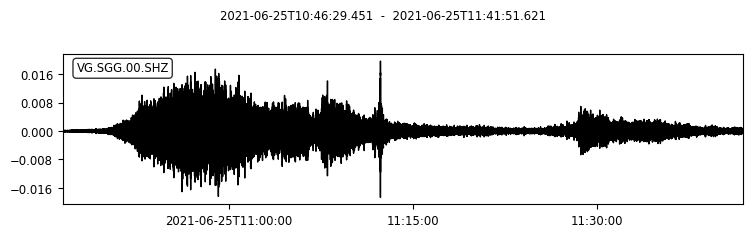

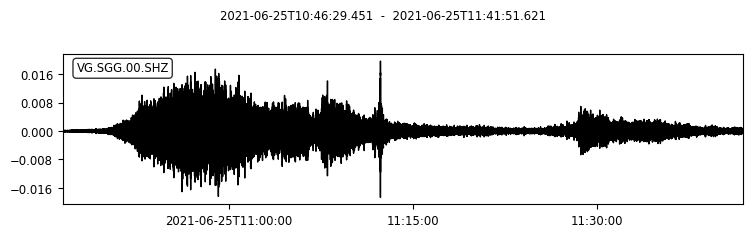

In [21]:
stunfilt = read('/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/Eruption-Letusan/20210625104629/SGG_SHZ_VG_00.mseed')
stunfilt.plot()

#Low-pass filter
stlp = stunfilt.filter("lowpass", freq=1.0)
stlp.plot()

#High-pass filter
sthp = stunfilt.filter("highpass", freq=20.)
sthp.plot()

#Bandpass filter
stbp = stunfilt.filter("bandpass", freqmin=1.0, freqmax=5.0)
stbp.plot()

# **3. Event Seismic di Gunungapi**

**Teleseismic**

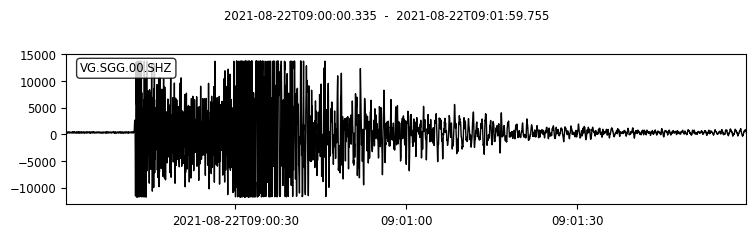

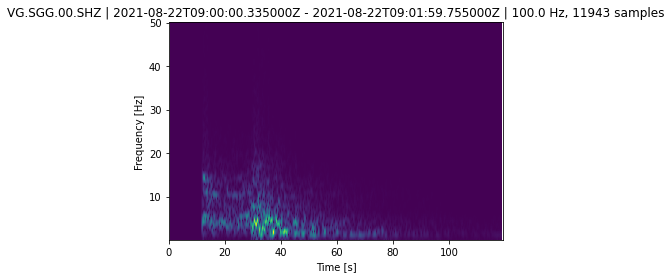

[None]

In [13]:
stts = read('/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/Teleseismic/20210822090000/SGG_SHZ_VG_00.mseed')
stts.plot()
stts.spectrogram()

**Gempa Volcanotectonics**

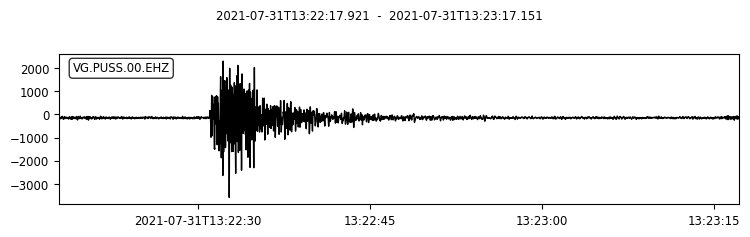

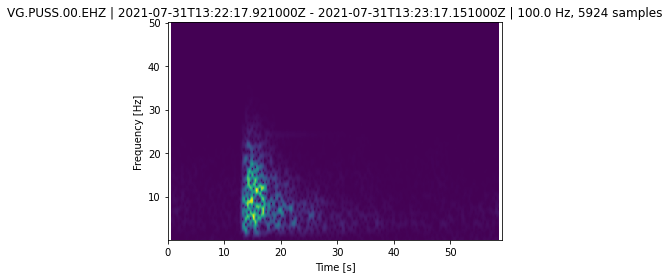

[None]

In [14]:
stvt = read('/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/DeepProximalVT-VulkanikDalam/20210731132217/PUSS_EHZ_VG_00.mseed')
stvt.plot()
stvt.spectrogram()

**Gempa Low-frequency**

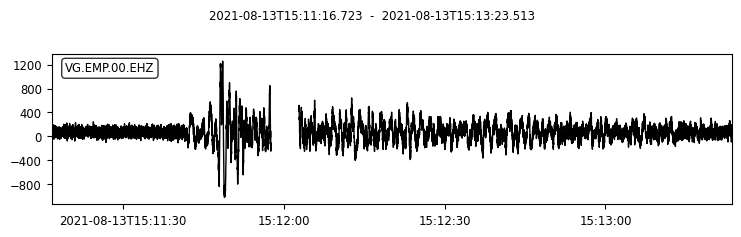

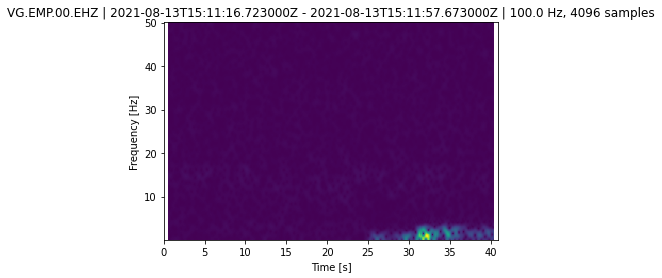

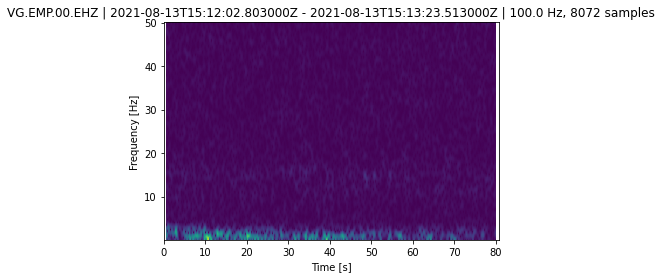

[None, None]

In [15]:
stlf = read('/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/LowFrequency-FrekuensiRendah/20210813151116/EMP_EHZ_VG_00.mseed')
stlf.plot()
stlf.spectrogram()

**Gempa Tornillo**

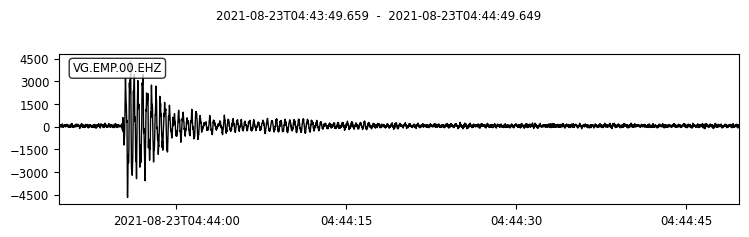

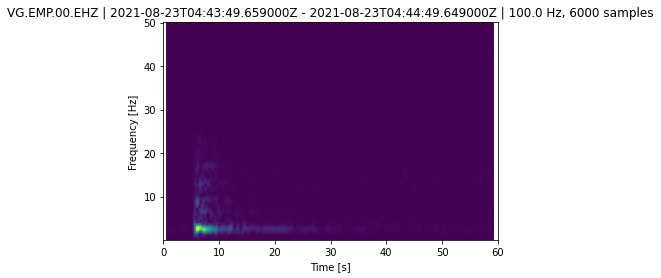

[None]

In [16]:
sttor = read('/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/Tornillo/20210823044349/EMP_EHZ_VG_00.mseed')
sttor.plot()
sttor.spectrogram()

# **4. Perhitungan Amplitudo Seismik antar waktu (RSAM)**

https://github.com/ThomasLecocq/ssxm

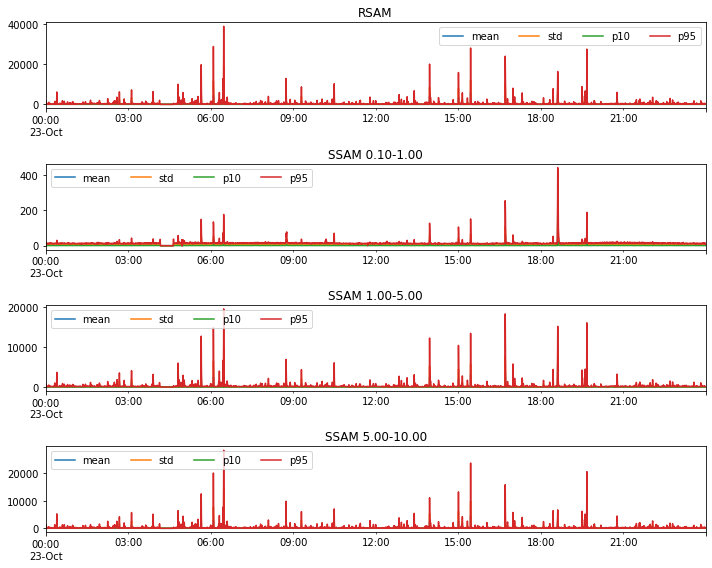

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from obspy import read
import numpy as np
from obspy.signal.filter import bandpass
from scipy.stats import scoreatpercentile

# Function
def ssxm(data, fs, id, starttime, rule='30S', bands=[], corners=4,
         zerophase=False, percentiles=None):
    """
    SSxM of a signal.
    Computes the SSxM of the given data which can be windowed or not.
    The sonogram is determined by the power in half octave bands of the given
    data.
    If data are windowed the analytic signal and the envelope of each window
    is returned.
    :type data: :class:`~numpy.ndarray`
    :param data: Data to make envelope of.
    :param fs: Sampling frequency in Hz.
    :param id: ID of the trace.
    :param starttime: The starttime of the trace :class:`~datetime.datetime`.
    :param rule: Windowing rule, following pandas' conventions.
    :param bands: :class:`~list` of tuples containing upper and
        lower frequencies for the bandpass. If None, only RSAM and RSEM
        are returned.
    :param corners: Filter corners. Note: This is twice the value of PITSA's
        filter sections.
    :param zerophase: If True, apply filter once forwards and once backwards.
        This results in twice the number of corners but zero phase shift in
        the resulting filtered trace.
    :param percentiles: :class:`~list` containing percentiles to compute in
        addition to.
    :return: SSAM data in a :class:`~pandas.DataFrame`.
    """
    # Convert input data to a pandas.Series object
    data = data.astype(float)
    npts = len(data)
    delta = 1./fs
    t = pd.date_range(starttime, periods=npts,
                      freq="%ims" % (delta * 1000))
    t = pd.DatetimeIndex(t, name='timestamp')
    s = pd.Series(data=data, index=t, name=id, dtype=data.dtype)
    del npts, delta

    bands.insert(0, [0, 0])

    all = []
    for band in bands:
        if band != [0, 0]:
            tmp = s.copy()
            tmp[:] = bandpass(tmp, band[0], band[1], fs, corners=corners,
                              zerophase=zerophase)
            band_label = "SSAM %0.2f-%0.2f" % (band[0], band[1])
        else:
            tmp = s.copy()
            band_label = "RSAM"
        rs = tmp.resample(rule)
        df = pd.DataFrame()
        df['mean'] = rs.apply(ssam)
        df['std'] = rs.apply(ssem)
        df['band'] = band_label

        if percentiles:
            for perc in percentiles:
                P = Percentile(percentile=perc)
                df["p%i" % perc] = rs.apply(P.scoreatpercentile)
        all.append(df)

        del tmp
    data = pd.concat(all)
    del s
    # data.set_index(['low', 'high'], inplace=True, append=True)
    return data


def ssam(d):
    """
    Computes the SSAM of an given array.
    """
    return np.mean(np.abs(d))


def ssem(d):
    """
    Computes the SSEM of an given array.
    """
    return np.std(d)


class Percentile():
    def __init__(self, percentile):
        self.percentile = percentile

    def scoreatpercentile(self, a):
        return scoreatpercentile(np.abs(a), self.percentile)

# CONFIG
rule = "30S"
bands = [[0.1, 1.0], [1.0, 5.0], [5.0, 10.0]] # in Hz
percentiles = [10, 95]


# Read a trace
strsam = read("/content/drive/MyDrive/4_PRESENTATIONS/2021-08-31 -- Workshop Data Vulkanologi Unsyiah/VolcanoSeismicEventsData/SDSDaily/VG.ABNG.00.EHZ.D.2017.296")

strsam.detrend("demean")

# array holding results, much faster than appending on the fly
rsam = []
# select component
Z = strsam.select(component="Z")
for tr in Z:
    data =  tr.data
    fs = tr.stats.sampling_rate
    starttime = tr.stats.starttime.datetime

    tmp = ssxm(data, fs, id, starttime, rule=rule, bands=bands, percentiles=percentiles)
    rsam.append(tmp)

# merging the array holding results now
rsam = pd.concat(rsam)

# grouping by "bands" and names
bands = rsam.groupby('band')
nbands = len(bands)

# plotting all bands
plt.figure(figsize=(10, 8))
i = 1
for id, band in bands:
    ax = plt.subplot(nbands, 1, i)
    band.plot(ax=ax)
    plt.title(id)
    plt.xlabel("")
    plt.legend(ncol=4)
    i += 1
plt.tight_layout()
plt.show()

# **Bonus section**

Pemodelan sebaran dan jatuhan abu:

https://vsc-ash.wr.usgs.gov/